<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20221030.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis
* Iterators

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotnine as gg
from plotnine import ggplot, aes
from datetime import datetime, date, time, timezone, timedelta

import os
import re 

from functools import reduce 
from collections import defaultdict

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Customer Analysis

In [3]:
os.listdir()

['.config',
 'sample-sales-data.csv',
 '1_orders_dataset.csv',
 '1_customers_dataset.csv',
 'online_retail_II.xlsx',
 'mock_sales_data.csv',
 '1_order_payments_dataset.csv',
 'match_result_test.csv',
 'sales.csv',
 'scanner_data.csv',
 'Breakfast at the Frat.xlsx',
 'mall_customers.csv',
 'sales_data_with_stores.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'online_retail.xlsx',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'test.csv',
 'groceries.csv',
 'ecommerce-data.csv',
 'sales_vs_discount.csv',
 'sample_data']

In [4]:
df_store = pd.read_excel('Breakfast at the Frat.xlsx', sheet_name='dh Store Lookup')
df_product = pd.read_excel('Breakfast at the Frat.xlsx', sheet_name='dh Products Lookup')
df_trans = pd.read_excel('Breakfast at the Frat.xlsx', sheet_name='dh Transaction Data')

In [7]:
df_store.columns = [a.lower() for a in df_store.iloc[0]]
df_store.drop([0], axis = 0, inplace = True)
df_store.head()

,STORE_ID,STORE_NAME,ADDRESS_CITY_NAME,ADDRESS_STATE_PROV_CODE,MSA_CODE,SEG_VALUE_NAME,PARKING_SPACE_QTY,SALES_AREA_SIZE_NUM,AVG_WEEKLY_BASKETS
1,389,SILVERLAKE,ERLANGER,KY,17140,MAINSTREAM,408,46073,24766.807692
2,2277,ANDERSON TOWNE CTR,CINCINNATI,OH,17140,UPSCALE,NaN,81958,54052.519231
3,4259,WARSAW AVENUE,CINCINNATI,OH,17140,VALUE,NaN,48813,31177.333333
4,6379,KINGWOOD,KINGWOOD,TX,26420,MAINSTREAM,NaN,50237,20620.423077
5,6431,AT WARD ROAD,BAYTOWN,TX,26420,VALUE,350,43698,24321.942308


In [12]:
df_product.columns = [a.lower() for a in df_product.iloc[0]]
df_product.drop([0], axis = 0, inplace = True)
df_product.head()

,upc,description,manufacturer,category,sub_category,product_size
1,1111009477,PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
2,1111009497,PL PRETZEL STICKS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
3,1111009507,PL TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
4,1111035398,PL BL MINT ANTSPTC RINSE,PRIVATE LABEL,ORAL HYGIENE PRODUCTS,MOUTHWASHES (ANTISEPTIC),1.5 LT
5,1111038078,PL BL MINT ANTSPTC RINSE,PRIVATE LABEL,ORAL HYGIENE PRODUCTS,MOUTHWASHES (ANTISEPTIC),500 ML


In [13]:
df_trans.columns = [a.lower() for a in df_trans.iloc[0]]
df_trans.drop([0], axis = 0, inplace = True)
df_trans.head()

,week_end_date,store_num,upc,units,visits,hhs,spend,price,base_price,feature,display,tpr_only
1,2009-01-14 00:00:00,367,1111009477,13,13,13,18.07,1.39,1.57,0,0,1
2,2009-01-14 00:00:00,367,1111009497,20,18,18,27.8,1.39,1.39,0,0,0
3,2009-01-14 00:00:00,367,1111009507,14,14,14,19.32,1.38,1.38,0,0,0
4,2009-01-14 00:00:00,367,1111035398,4,3,3,14,3.5,4.49,0,0,1
5,2009-01-14 00:00:00,367,1111038078,3,3,3,7.5,2.5,2.5,0,0,0


In [14]:
df_trans['week_end_date'] = df_trans['week_end_date'].to_numpy().astype('datetime64[D]')
df_trans.head()

,week_end_date,store_num,upc,units,visits,hhs,spend,price,base_price,feature,display,tpr_only
1,2009-01-14,367,1111009477,13,13,13,18.07,1.39,1.57,0,0,1
2,2009-01-14,367,1111009497,20,18,18,27.8,1.39,1.39,0,0,0
3,2009-01-14,367,1111009507,14,14,14,19.32,1.38,1.38,0,0,0
4,2009-01-14,367,1111035398,4,3,3,14,3.5,4.49,0,0,1
5,2009-01-14,367,1111038078,3,3,3,7.5,2.5,2.5,0,0,0


In [15]:
df_trans.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.


,week_end_date,store_num,upc,units,visits,hhs,spend,price,base_price,feature,display,tpr_only
count,524950,524950.0,5.249500e+05,524950.0,524950.0,524950.0,524950.00,524927.00,524765.00,524950.0,524950.0,524950.0
unique,156,77.0,5.500000e+01,568.0,456.0,446.0,20287.00,699.00,676.00,2.0,2.0,2.0
top,2011-05-11 00:00:00,2277.0,1.600028e+09,1.0,1.0,1.0,4.59,2.99,2.99,0.0,0.0,0.0
freq,3589,8045.0,1.198500e+04,41942.0,44429.0,44828.0,5573.00,22876.00,29211.00,480699.0,467135.0,454216.0
first,2009-01-14 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-01-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df_trans['week'] = df_trans['week_end_date'] - df_trans['week_end_date'].dt.weekday.astype('timedelta64[D]')
df_trans[['week', 'week_end_date']].value_counts().head()

week        week_end_date
2011-05-09  2011-05-11       3589
2011-01-10  2011-01-12       3587
2011-01-17  2011-01-19       3580
2011-05-16  2011-05-18       3561
2011-02-07  2011-02-09       3560
dtype: int64

In [27]:
df = df_trans.groupby(['upc', 'week'])['price'].sum().reset_index().sort_values(['upc','week'])
df.head()

,upc,week,price
0,1111009477,2009-01-12,98.56
1,1111009477,2009-01-19,90.07
2,1111009477,2009-01-26,90.17
3,1111009477,2009-02-02,98.04
4,1111009477,2009-02-09,100.46


In [28]:
list_npu = df.groupby(['upc']).head(1)
list_week = df['week'].sort_values().unique()

In [32]:
res = list()

for weeks in list_week : 

  temp_npu = list_npu[list_npu['week'] == weeks]
  temp_pu = df[df['upc'].isin(temp_npu['upc'])]
  temp = temp_pu.groupby(['week'])['upc'].count().reset_index().rename(columns = {'upc':'pu'})
  temp['npu_week'] = np.repeat(weeks, len(temp))
  temp['diff'] = (temp['week'] - temp['npu_week']).dt.days // 7 
  temp['ratio'] = round(temp['pu']/temp['pu'].max() * 100, 2)
  temp['npu_week'] = temp['npu_week'].astype(str)

  temp = temp[['npu_week', 'diff', 'pu', 'ratio']]
  res.append(temp)

res = pd.concat(res)
res = pd.melt(res, id_vars = ['npu_week', 'diff'], var_name = 'type')
res.head()

,npu_week,diff,type,value
0,2009-01-12,0,pu,48.0
1,2009-01-12,1,pu,48.0
2,2009-01-12,2,pu,48.0
3,2009-01-12,3,pu,48.0
4,2009-01-12,4,pu,48.0


/usr/local/lib/python3.7/dist-packages/plotnine/facets/facet.py:393: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.


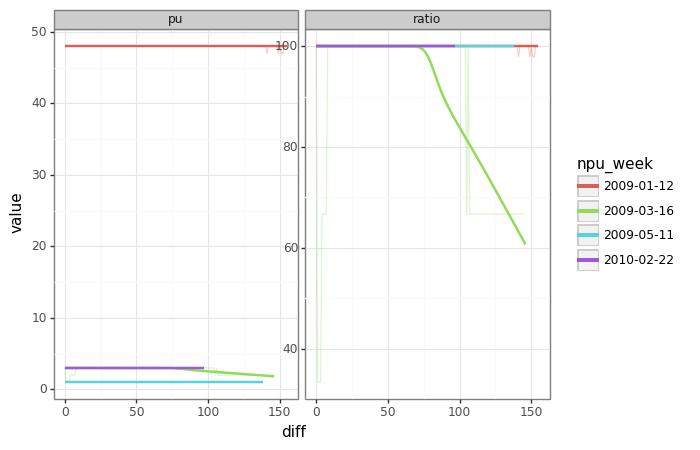

<ggplot: (8752238001885)>

In [36]:
(
    ggplot(res, aes('diff', 'value', color = 'npu_week')) +
    gg.geom_line(alpha = .3) +
    gg.geom_smooth(se = False) +
    gg.facet_wrap('~type', scales = 'free_y') +
    gg.theme_bw()
)

In [37]:
df_trans.head()

,week_end_date,store_num,upc,units,visits,hhs,spend,price,base_price,feature,display,tpr_only,week
1,2009-01-14,367,1111009477,13,13,13,18.07,1.39,1.57,0,0,1,2009-01-12
2,2009-01-14,367,1111009497,20,18,18,27.8,1.39,1.39,0,0,0,2009-01-12
3,2009-01-14,367,1111009507,14,14,14,19.32,1.38,1.38,0,0,0,2009-01-12
4,2009-01-14,367,1111035398,4,3,3,14,3.5,4.49,0,0,1,2009-01-12
5,2009-01-14,367,1111038078,3,3,3,7.5,2.5,2.5,0,0,0,2009-01-12


In [39]:
df2 = df_trans.groupby(['week', 'upc'])['visits', 'spend'].sum().reset_index()
df2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


,week,upc,visits,spend
0,2009-01-12,1111009477,3720,5455.50
1,2009-01-12,1111009497,4014,5936.13
2,2009-01-12,1111009507,1451,1999.97
3,2009-01-12,1111035398,203,846.74
4,2009-01-12,1111038078,323,776.28


In [41]:
df2['ratio'] = df2['spend']/df2['visits']
df2.head()

,week,upc,visits,spend,ratio
0,2009-01-12,1111009477,3720,5455.50,1.466532
1,2009-01-12,1111009497,4014,5936.13,1.478857
2,2009-01-12,1111009507,1451,1999.97,1.378339
3,2009-01-12,1111035398,203,846.74,4.171133
4,2009-01-12,1111038078,323,776.28,2.403344


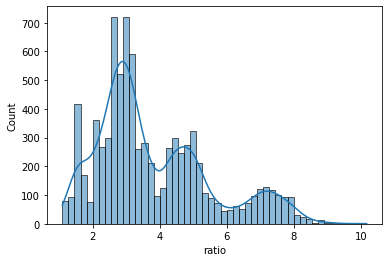

In [42]:
sns.histplot(data = df2, x = 'ratio', kde = True, bins = 50)

# Iterators

In [47]:
from string import ascii_lowercase as lower
lt = list(lower) + list(range(10))

names = ['park', 'kim', 'lee']

email = [''.join(np.random.choice(lt, np.random.randint(8, 15, 1), replace = True)) +
         np.random.choice(['@naver.com', '@gmail.com', '@yahoo.co.kr', '@nate.com'], 1)[0] for a in range(3)]
age = np.random.randint(20, 40, 3)
score = np.random.randint(3000, 5000, 3)

a = [{k : v} for k, v in zip(names, zip(email, age, score))]
a

[{'park': ('0hrwluzzsg2gxx@gmail.com', 35, 4925)},
 {'kim': ('3k5v2q9gqsnh@nate.com', 33, 3608)},
 {'lee': ('jjpej6t1t9fo9@nate.com', 27, 3941)}]

In [49]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [52]:
{k : eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]], users, [])') for k in list(users[0].keys())}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}